# Airline Dataset Processing

## TODO 

* [x] Imbalanced Data
* [ ] Outliers
* [ ] Feature engineering
* [ ] Train-test split

## Import Libraries

In [71]:
import os
from datetime import datetime
import logging
_ABSOLUTE_DIR = os.getcwd()
import typing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## SKLEARN LIBRARIES
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
import math

## Get pre-processed data

In [72]:
df_airline_train_preprocessed = pd.read_csv(f'{_ABSOLUTE_DIR}/../artifacts/data/airline/airline_train__preprocessed.csv')
df_airline_test_preprocessed = pd.read_csv(f'{_ABSOLUTE_DIR}/../artifacts/data/airline/airline_test__preprocessed.csv')

## Imbalanced data

The target of this dataset is the customer satisfaction. When we looked to the distribution of that feature in step 1, we verified that 43,3% of the training data are about satisfied customers and 56,7% are about unsatisfied customers. In the testing data, we verified that 43,9% of the data are about satisfied customers and 56,1% are about unsatisfied customers.

We are dealing with a balanced dataset, so it's not necessary perform data balancing.

## Outliers

In the first step, when we looked to the distribution of the feature Arrival Delay in Minutes and the feature Departure Delay in Minutes, we could see that most of the values are between 0 and 100 minutes but there are values up to 1592 minutes.

This shows that there may be some outliers.

### Outliers in Arrival Delay in Minutes

The maximum value that was recorded in this feature was the following:

In [73]:
max(df_airline_train_preprocessed['Arrival Delay in Minutes'].unique())

1584.0

Now, let's see the distribution of this feature in both datasets again.

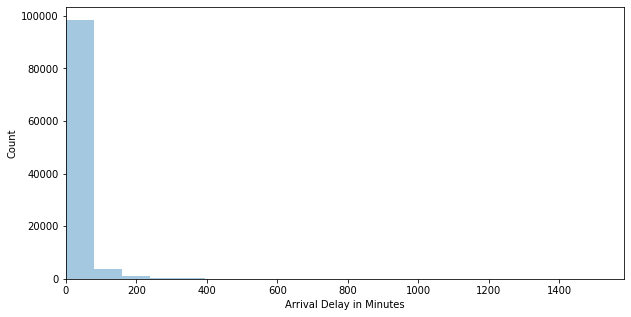

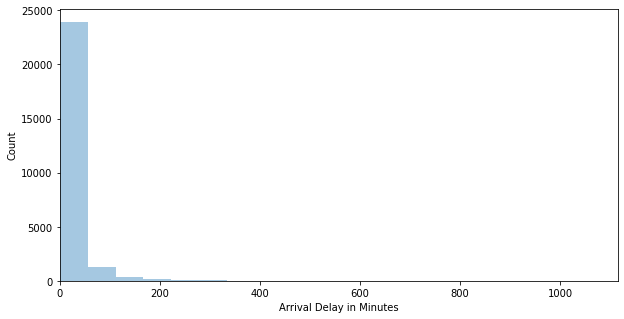

In [74]:
plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed['Arrival Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed['Arrival Delay in Minutes'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed['Arrival Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed['Arrival Delay in Minutes'],bins=20,kde=False)
plt.show()

We can see that the majority of the values are between 0 and 200. So, we are going to discard the values that are bigger than 200.

First, we make copies of the dataframes to ensure that data balance is not compromised, if it's not then we place the transformations on the original dataframes.

Now, we can see the new distribution of the data of this feature.

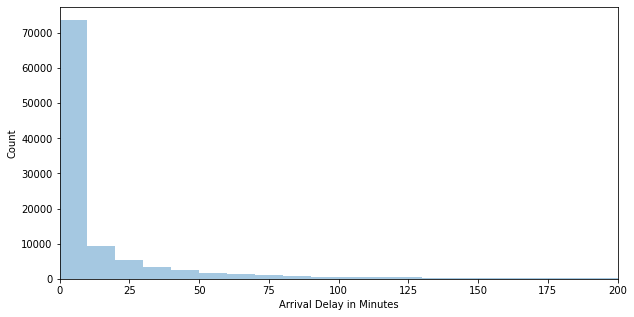

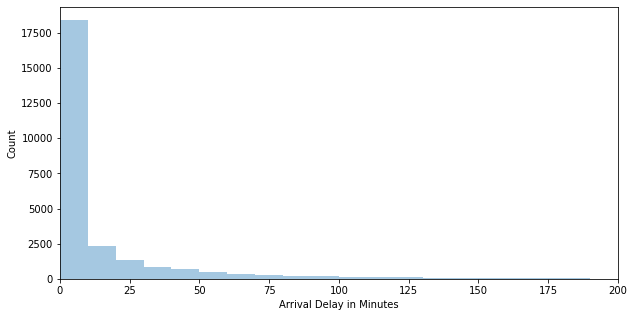

In [75]:
df_airline_train_preprocessed_v1= df_airline_train_preprocessed.copy()
df_airline_test_preprocessed_v1= df_airline_test_preprocessed.copy()
df_airline_train_preprocessed_v1 = df_airline_train_preprocessed_v1[df_airline_train_preprocessed_v1['Arrival Delay in Minutes']<=200]
df_airline_test_preprocessed_v1 = df_airline_test_preprocessed_v1[df_airline_test_preprocessed_v1['Arrival Delay in Minutes']<=200]

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed_v1['Arrival Delay in Minutes'].unique()))
plt.xlabel(str('Arrival Delay in Minutes'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed_v1['Arrival Delay in Minutes'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed_v1['Arrival Delay in Minutes'].unique()))
plt.xlabel(str('Arrival Delay in Minutes'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed_v1['Arrival Delay in Minutes'],bins=20,kde=False)
plt.show()

Now let's see if this transformation affected the balance of the data.

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

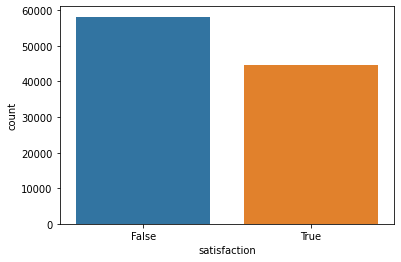

In [76]:
sns.countplot(x = df_airline_train_preprocessed_v1['satisfaction'])

In [77]:
print(f'In terms of percentage in the trainining set, {round(df_airline_train_preprocessed_v1["satisfaction"].sum()/df_airline_train_preprocessed_v1["satisfaction"].count(),3)*100}% are satisfied in the data related to the training dataset.')

In terms of percentage in the trainining set, 43.4% are satisfied in the data related to the training dataset.


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

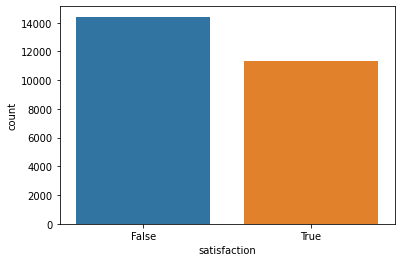

In [78]:
sns.countplot(x = df_airline_test_preprocessed_v1['satisfaction'])

In [79]:
print(f'In terms of percentage in the test set, {round(df_airline_test_preprocessed_v1["satisfaction"].sum()/df_airline_test_preprocessed_v1["satisfaction"].count(),3)*100}% are satisfied in the data related to the test dataset.')

In terms of percentage in the test set, 43.9% are satisfied in the data related to the test dataset.


We can see that this transformation did not affect the balance of the data, on the contrary, the data were even more balanced.

### Outliers in Departure Delay in Minutes

Now let's look to the feature Departure Delay in Minutes.

The maximum value that was recorded in this feature was the following:

In [80]:
max(df_airline_train_preprocessed['Departure Delay in Minutes'].unique())

1592

Now, let's see the distribution of this feature in both datasets again.

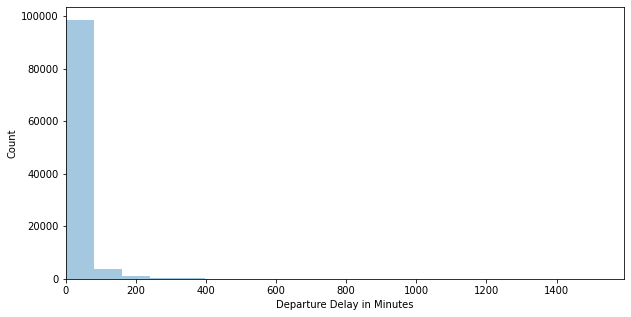

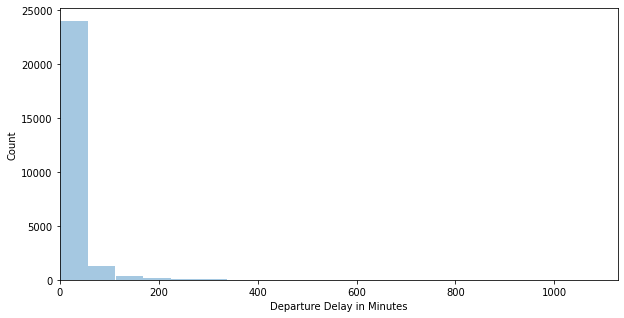

In [81]:
plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed['Departure Delay in Minutes'].unique()))
plt.xlabel(str('Departure Delay in Minutes'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed['Departure Delay in Minutes'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed['Departure Delay in Minutes'].unique()))
plt.xlabel(str('Departure Delay in Minutese'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed['Departure Delay in Minutes'],bins=20,kde=False)
plt.show()

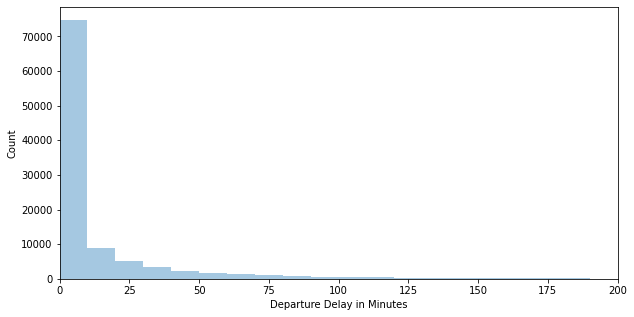

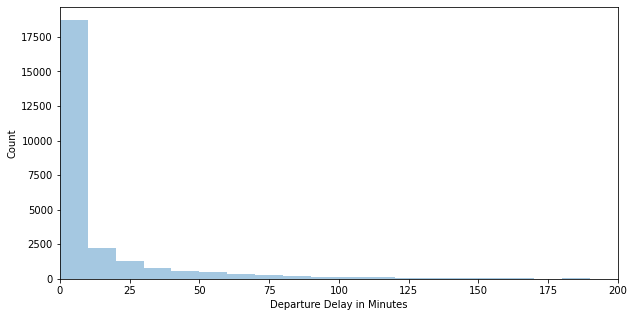

In [82]:
df_airline_train_preprocessed_v1 = df_airline_train_preprocessed_v1[df_airline_train_preprocessed_v1['Departure Delay in Minutes']<=200]
df_airline_test_preprocessed_v1 = df_airline_test_preprocessed_v1[df_airline_test_preprocessed_v1['Departure Delay in Minutes']<=200]

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed_v1['Departure Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed_v1['Departure Delay in Minutes'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed_v1['Departure Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed_v1['Departure Delay in Minutes'],bins=20,kde=False)
plt.show()

<AxesSubplot:xlabel='satisfaction', ylabel='count'>

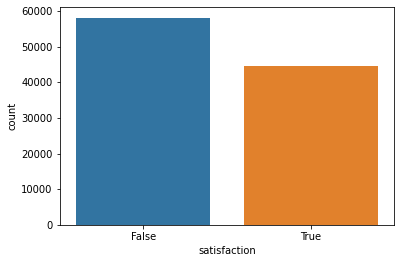

In [83]:
sns.countplot(x = df_airline_train_preprocessed_v1['satisfaction'])

In [84]:
print(f'In terms of percentage in the trainining set, {round(df_airline_train_preprocessed_v1["satisfaction"].sum()/df_airline_train_preprocessed_v1["satisfaction"].count(),3)*100}% are satisfied in the data related to the training dataset.')

In terms of percentage in the trainining set, 43.4% are satisfied in the data related to the training dataset.


<AxesSubplot:xlabel='satisfaction', ylabel='count'>

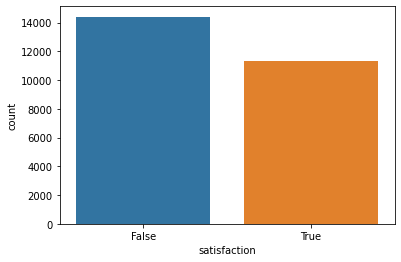

In [85]:
sns.countplot(x = df_airline_test_preprocessed_v1['satisfaction'])

In [86]:
print(f'In terms of percentage in the test set, {round(df_airline_test_preprocessed_v1["satisfaction"].sum()/df_airline_test_preprocessed_v1["satisfaction"].count(),3)*100}% are satisfied in the data related to the test dataset.')

In terms of percentage in the test set, 44.0% are satisfied in the data related to the test dataset.


In [ ]:
df_airline_train_preprocessed= df_airline_train_preprocessed_v1
df_airline_test_preprocessed= df_airline_test_preprocessed_v1

## Feature Engineering

### Scaling Flight Distance

In the first step, we observed that the distribution of the Flight Distance feature is between ranges with higher values relative to other features. Various Machine Learning models don't generalize as well on data with high scale variance, so let's perform the scaling of this feature. For that, we will use the log function, i.e., the original value is replaced by the value of its logarithm with the sum of 1.

The original values of this feature are distributed like this:

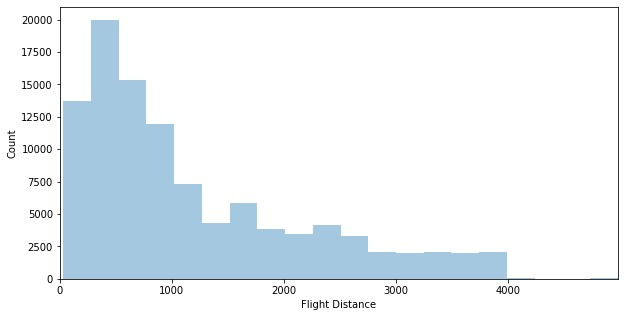

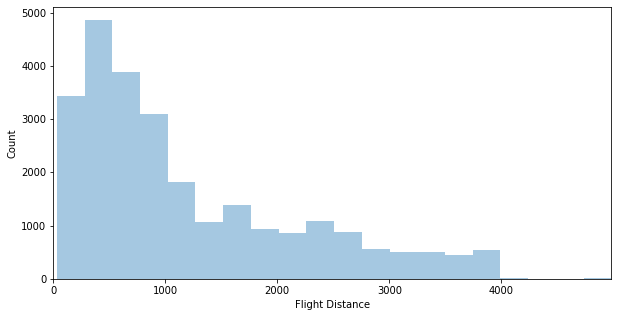

In [30]:
plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed['Flight Distance'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed['Flight Distance'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed['Flight Distance'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed['Flight Distance'],bins=20,kde=False)
plt.show()

We replace this values for their logartihm with the sum of 1:

In [31]:
df_airline_train_preprocessed['Flight Distance'] = np.log(df_airline_train_preprocessed['Flight Distance']+1)
df_airline_test_preprocessed['Flight Distance'] = np.log(df_airline_test_preprocessed['Flight Distance']+1)

And the new distribution of the values of this feature is like this:

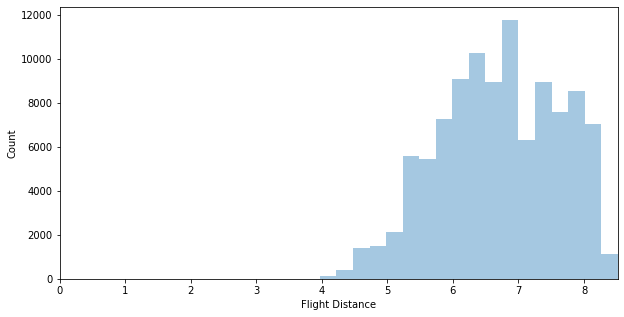

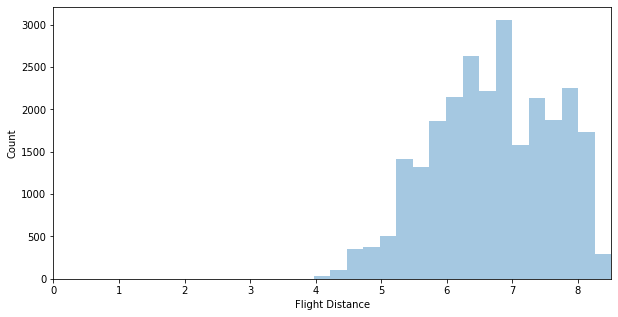

In [32]:
plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed['Flight Distance'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed['Flight Distance'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed['Flight Distance'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed['Flight Distance'],bins=20,kde=False)
plt.show()

### Scaling Age

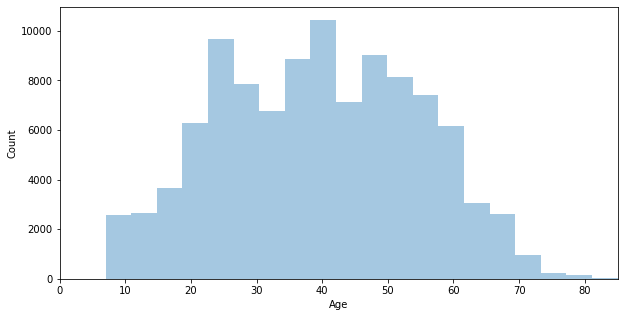

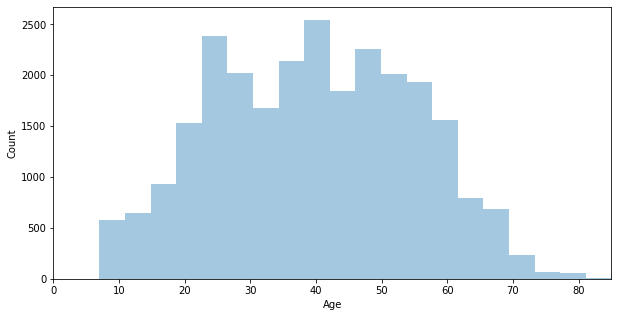

In [33]:
plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed['Age'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed['Age'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed['Age'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed['Age'],bins=20,kde=False)
plt.show()

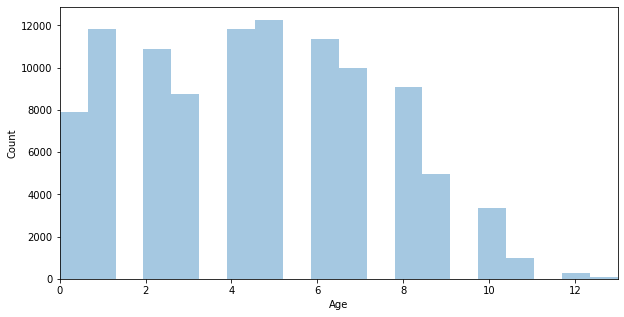

In [34]:
age_ranges = [
    df_airline_train_preprocessed['Age'] < 18, 
    (df_airline_train_preprocessed['Age'] >=18) & (df_airline_train_preprocessed['Age'] <= 24), 
    (df_airline_train_preprocessed['Age'] > 24) & (df_airline_train_preprocessed['Age'] <= 29), 
    (df_airline_train_preprocessed['Age'] > 29) & (df_airline_train_preprocessed['Age'] <= 34), 
    (df_airline_train_preprocessed['Age'] > 34) & (df_airline_train_preprocessed['Age'] <= 39), 
    (df_airline_train_preprocessed['Age'] > 39) & (df_airline_train_preprocessed['Age'] <= 44), 
    (df_airline_train_preprocessed['Age'] > 44) & (df_airline_train_preprocessed['Age'] <= 49), 
    (df_airline_train_preprocessed['Age'] > 49) & (df_airline_train_preprocessed['Age'] <= 54), 
    (df_airline_train_preprocessed['Age'] > 54) & (df_airline_train_preprocessed['Age'] <= 59), 
    (df_airline_train_preprocessed['Age'] > 59) & (df_airline_train_preprocessed['Age'] <= 64), 
    (df_airline_train_preprocessed['Age'] > 64) & (df_airline_train_preprocessed['Age'] <= 69), 
    (df_airline_train_preprocessed['Age'] > 69) & (df_airline_train_preprocessed['Age'] <= 74), 
    (df_airline_train_preprocessed['Age'] > 74) & (df_airline_train_preprocessed['Age'] <= 79), 
    (df_airline_train_preprocessed['Age'] > 79) 
]

new_age_values = [
    0, 
    1, 
    2,
    3,
    4,
    5,
    6,
    7,
    8,
    9,
    10,
    11,
    12,
    13
    
]
df_airline_train_preprocessed['Age'] = np.select(age_ranges,new_age_values)

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed['Age'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed['Age'],bins=20,kde=False)
plt.show()


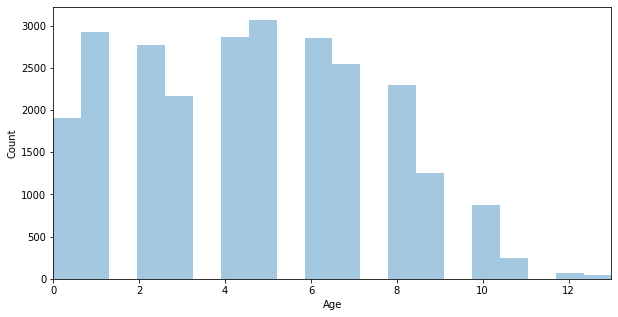

In [35]:
age_ranges_test = [
    df_airline_test_preprocessed['Age'] < 18, 
    (df_airline_test_preprocessed['Age'] >=18) & (df_airline_test_preprocessed['Age'] <= 24), 
    (df_airline_test_preprocessed['Age'] > 24) & (df_airline_test_preprocessed['Age'] <= 29), 
    (df_airline_test_preprocessed['Age'] > 29) & (df_airline_test_preprocessed['Age'] <= 34), 
    (df_airline_test_preprocessed['Age'] > 34) & (df_airline_test_preprocessed['Age'] <= 39), 
    (df_airline_test_preprocessed['Age'] > 39) & (df_airline_test_preprocessed['Age'] <= 44), 
    (df_airline_test_preprocessed['Age'] > 44) & (df_airline_test_preprocessed['Age'] <= 49), 
    (df_airline_test_preprocessed['Age'] > 49) & (df_airline_test_preprocessed['Age'] <= 54), 
    (df_airline_test_preprocessed['Age'] > 54) & (df_airline_test_preprocessed['Age'] <= 59), 
    (df_airline_test_preprocessed['Age'] > 59) & (df_airline_test_preprocessed['Age'] <= 64), 
    (df_airline_test_preprocessed['Age'] > 64) & (df_airline_test_preprocessed['Age'] <= 69), 
    (df_airline_test_preprocessed['Age'] > 69) & (df_airline_test_preprocessed['Age'] <= 74), 
    (df_airline_test_preprocessed['Age'] > 74) & (df_airline_test_preprocessed['Age'] <= 79), 
    (df_airline_test_preprocessed['Age'] > 79) 
]

df_airline_test_preprocessed['Age'] = np.select(age_ranges_test,new_age_values)

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed['Age'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed['Age'],bins=20,kde=False)
plt.show()

### Scaling Arrival Delay in Minutes

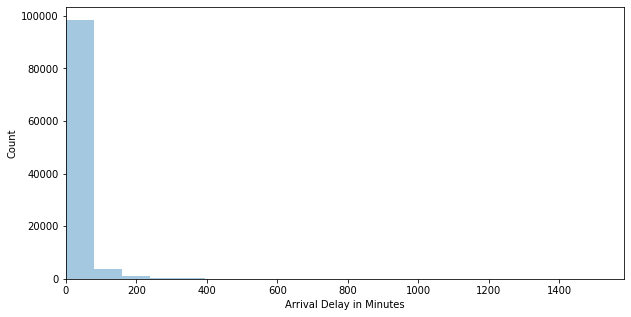

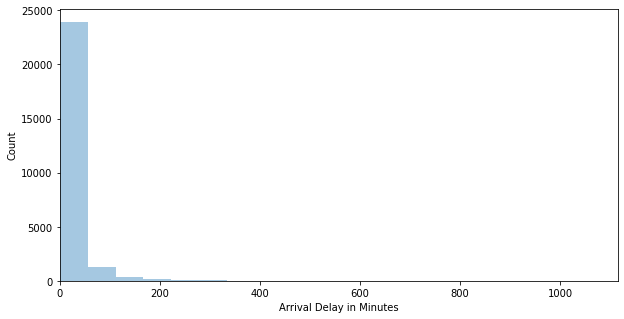

In [36]:
plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_train_preprocessed['Arrival Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_train_preprocessed['Arrival Delay in Minutes'],bins=20,kde=False)
plt.show()

plt.figure(figsize=(10,5))
plt.xlim(0,max(df_airline_test_preprocessed['Arrival Delay in Minutes'].unique()))
plt.xlabel(str('Flight Distance'))
plt.ylabel('Count')
sns.distplot(df_airline_test_preprocessed['Arrival Delay in Minutes'],bins=,kde=False)
plt.show()

In [41]:
contador = 0
for i in df_airline_train_preprocessed['Arrival Delay in Minutes']:
    if i > 200:
        contador+=1
        
print(contador/len(df_airline_train_preprocessed))

0.007790026449408267
